<a href="https://colab.research.google.com/github/WonMin13/Artificial-Intelligence-Technologies/blob/main/%D0%9B%D0%B0%D0%B1%D0%BE%D1%80%D0%B0%D1%82%D0%BE%D1%80%D0%BD%D0%B0%D1%8F%20%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0%20%E2%84%966%3A%20%D0%93%D1%80%D0%B0%D0%B4%D0%B8%D0%B5%D0%BD%D1%82%D0%BD%D1%8B%D0%B9%20%D0%B1%D1%83%D1%81%D1%82%D0%B8%D0%BD%D0%B3/6133_DubmanLB_lab_6_%D0%93%D1%80%D0%B0%D0%B4%D0%B8%D0%B5%D0%BD%D1%82%D0%BD%D1%8B%D0%B9_%D0%B1%D1%83%D1%81%D1%82%D0%B8%D0%BD%D0%B3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Лабораторная работа №6. Градиентный бустинг.**

**Выполнила: 6133-010402D, Дубман Любовь Борисовна.**

Данные доступены на [Kaggle](https://www.kaggle.com/datasets/kevinarvai/clinvar-conflicting).

# Задание

## Задание 1. Считать в pandas.DataFrame любой источник данных:


* CSV,
* JSON,
* Excel-файл,  
* HTML-таблицу и т.п.

      Датасет должен содержать категориальные и количественные признаки.

## Задание 2. Датасет и подготовка данных:


* Привести описание датасета.
* Осуществить предобработку данных (избавиться от null, убрать некоторые признаки и т.п.) - "подчистить данные".
* Нормализовать численные данные.
* Разбить выборку на обучающую и тестовую.
      Из датафреймов обучающей и тестовой выборки необходимо сформировать два набора обучающей и тестовой выборок: с закодированными категориальными признаками и с категориальными признаками без обработки.

## Задание 3. Для каждого из классификаторов (AdaBoost, GradientBoostingClassifier, XGBoost, CatBoost):

* С использованием GridSearchCV/grid_search осуществить подбор гиперпараметра модели, использовать выборки с закодированными категориальными признаками.
      Как минимум основных: n_estimators/iterations, learning_rate, depth, параметры регуляризации L^1, L^2.
      Для ускорения вычислений можно сразу с заданным значением early_stopping_rounds – тогда понадобится еще выделить валидационный датасет (XGBoost) или задать значение train_size у CatBoost (часть обучающей выборки пойдет в валидационный набор).

* Обучить модели XGBoost и CatBoost с найденными гиперпараметрами на обучающей выборке с категориальными признаками "как есть".
* Итого получить 6 обученных моделей.
* Вывести метрики на тестовом наборе (как минимум classification_report, другие по желанию).
* Сравнить модели, выбрать лучшую.
      Ожидаемый результат – XGBoost, CatBoost

## Задание 4. Важность признаков:

* С использованием shap.TreeExplainer получить SHAP-значения для лучшей модели.
* Построить график shap.plots.force для одного объекта выборки и для среза произвольного размера.
* Построить график shap.plots.bar для одного объекта выборки.
* Построить график shap.plots.waterfall для одного объекта выборки.
* Построить 2 графика shap.plots.scatter для какого-нибудь признака. На одном раскрасить относительно себя, на втором – относительно другого признака.
* Построить график shap.plots.beeswarm для всех признаков.
* Построить график shap.plots.bar для всех признаков.
* На основании двух последних графиков и/или используя feature_importance отфильровать признаки (отразить сформулированные выводы в тексте), переобучить лучшую модель.
* Сравнить метрики до и после фильтрации.
* Визуализировать полученное дерево решений.

## Задание 5. Регрессия:

* С использованием GridSearchCV/grid_search осуществить подбор гиперпараметра модели линейной регрессии с использованием XGBoost или CatBoost.
      xgboost.XGBRegressor в XGBoost, CatBoostRegressor в CatBoost. В целом, можно выбрать новый таргет из уже полученного разбиения на обучающую и тестовыую выборки из пункта 2.

* Вывести метрики MAE, MSE, R^2 на тестовом наборе.
* Переобучить модель на отфильтрованном наборе признаков из пункта 4.
* Сравнить метрики до и после фильтрации.

# Выполнение лабораторной работы

## Задание 1.

### Загружаем catboost

In [1]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 6.2 MB/s eta 0:00:00


### Загружаем shap

In [2]:
pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.5/540.5 kB 7.3 MB/s eta 0:00:00


### Подключаем библиотеки

In [24]:
import catboost
import pandas as pd
from sklearn.model_selection import train_test_split
from catboost.utils import get_roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt
import sklearn.metrics
from catboost import Pool
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction import FeatureHasher
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, accuracy_score, recall_score, precision_score, f1_score
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
# Подавление предупреждений
warnings.filterwarnings("ignore", category=Warning)
import shap
import numpy as np
from catboost import CatBoostRegressor, Pool
import xgboost as xgb
import graphviz
from xgboost import plot_tree
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import graphviz

### Подключение Google Drive

In [25]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Считывание датасета

In [27]:
df = pd.read_csv('/content/drive/MyDrive/datasets/clinvar_conflicting.csv', dtype={0: object, 38: str, 40: object})

## Задание 2.

### Описание датасета

In [28]:
df.head()

,CHROM,POS,REF,ALT,AF_ESP,AF_EXAC,AF_TGP,CLNDISDB,CLNDISDBINCL,CLNDN,...,SIFT,PolyPhen,MOTIF_NAME,MOTIF_POS,HIGH_INF_POS,MOTIF_SCORE_CHANGE,LoFtool,CADD_PHRED,CADD_RAW,BLOSUM62
0,1,1168180,G,C,0.0771,0.10020,0.1066,MedGen:CN169374,NaN,not_specified,...,tolerated,benign,NaN,NaN,NaN,NaN,NaN,1.053,-0.208682,2.0
1,1,1470752,G,A,0.0000,0.00000,0.0000,"MedGen:C1843891,OMIM:607454,Orphanet:ORPHA9877...",NaN,Spinocerebellar_ataxia_21|not_provided,...,deleterious_low_confidence,benign,NaN,NaN,NaN,NaN,NaN,31.000,6.517838,-3.0
2,1,1737942,A,G,0.0000,0.00001,0.0000,"Human_Phenotype_Ontology:HP:0000486,MedGen:C00...",NaN,Strabismus|Nystagmus|Hypothyroidism|Intellectu...,...,deleterious,probably_damaging,NaN,NaN,NaN,NaN,NaN,28.100,6.061752,-1.0
3,1,2160305,G,A,0.0000,0.00000,0.0000,"MedGen:C1321551,OMIM:182212,SNOMED_CT:83092002...",NaN,Shprintzen-Goldberg_syndrome|not_provided,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.500,3.114491,NaN
4,1,2160305,G,T,0.0000,0.00000,0.0000,"MedGen:C1321551,OMIM:182212,SNOMED_CT:83092002",NaN,Shprintzen-Goldberg_syndrome,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.700,4.766224,-3.0


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65188 entries, 0 to 65187
Data columns (total 46 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CHROM               65188 non-null  object 
 1   POS                 65188 non-null  int64  
 2   REF                 65188 non-null  object 
 3   ALT                 65188 non-null  object 
 4   AF_ESP              65188 non-null  float64
 5   AF_EXAC             65188 non-null  float64
 6   AF_TGP              65188 non-null  float64
 7   CLNDISDB            65188 non-null  object 
 8   CLNDISDBINCL        167 non-null    object 
 9   CLNDN               65188 non-null  object 
 10  CLNDNINCL           167 non-null    object 
 11  CLNHGVS             65188 non-null  object 
 12  CLNSIGINCL          167 non-null    object 
 13  CLNVC               65188 non-null  object 
 14  CLNVI               27659 non-null  object 
 15  MC                  64342 non-null  object 
 16  ORIG

In [30]:
print(df.CLNVC.unique())
print(df.IMPACT.unique())
print(df.PolyPhen.unique())
print(df.SIFT.unique())
print(df.BIOTYPE.unique())

['single_nucleotide_variant' 'Deletion' 'Duplication' 'Indel' 'Inversion'
 'Insertion' 'Microsatellite']
['MODERATE' 'MODIFIER' 'LOW' 'HIGH']
['benign' 'probably_damaging' nan 'possibly_damaging' 'unknown']
['tolerated' 'deleterious_low_confidence' 'deleterious' nan
 'tolerated_low_confidence']
['protein_coding' 'misc_RNA' nan]


### Предобработка данных и нормализация

In [31]:
df = df.drop(["CLNDN",'CLNDISDBINCL','MOTIF_NAME','MOTIF_POS','HIGH_INF_POS','MOTIF_SCORE_CHANGE','DISTANCE','CLNHGVS','CLNDISDB',"CLNDNINCL",'CLNSIGINCL','SSR','INTRON','Codons','MC','CLNVI','SYMBOL','Amino_acids','Protein_position','CDS_position','EXON','cDNA_position','Feature', 'Feature_type','BAM_EDIT'], axis=1)
df.BIOTYPE = df.BIOTYPE.fillna('0')

In [32]:
# Выбор только числовых признаков для нормализации
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Инициализация StandardScaler
scaler = StandardScaler()

# Нормализация числовых признаков
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

In [33]:
fh = FeatureHasher(n_features=10, input_type='string')

# Преобразование каждой строки в столбце 'ALT' в список строк
hashed_alt = pd.DataFrame(fh.fit_transform(df['ALT'].apply(lambda x: [x])).toarray()).rename(columns={0:'ALT_1',
                                                                                                           1:'ALT_2',
                                                                                                           2:'ALT_3',
                                                                                                           3:'ALT_4',
                                                                                                           4:'ALT_5',
                                                                                                           5:'ALT_6',
                                                                                                           6:'ALT_7',
                                                                                                           7:'ALT_8',
                                                                                                           8:'ALT_9',
                                                                                                           9:'ALT_10'})


df = df.drop(columns=['ALT'])

df = pd.concat([df, hashed_alt], axis=1)



fh = FeatureHasher(n_features=10, input_type='string')

# Преобразование каждой строки в столбце 'REF' в список строк
hashed_ref = pd.DataFrame(fh.fit_transform(df['REF'].apply(lambda x: [x])).toarray()).rename(columns={0:'REF_1',
                                                                                                           1:'REF_2',
                                                                                                           2:'REF_3',
                                                                                                           3:'REF_4',
                                                                                                           4:'REF_5',
                                                                                                           5:'REF_6',
                                                                                                           6:'REF_7',
                                                                                                           7:'REF_8',
                                                                                                           8:'REF_9',
                                                                                                           9:'REF_10'})



df = df.drop(columns=['REF'])

df = pd.concat([df, hashed_ref], axis=1)



hashed_chrom = pd.DataFrame(fh.fit_transform(df['CHROM'].apply(lambda x: [x])).toarray()).rename(columns={0:'CHROM_1',
                                                                                                          1:'CHROM_2',
                                                                                                          2:'CHROM_3',
                                                                                                          3:'CHROM_4',
                                                                                                          4:'CHROM_5',
                                                                                                          5:'CHROM_6',
                                                                                                          6:'CHROM_7',
                                                                                                          7:'CHROM_8',
                                                                                                          8:'CHROM_9',
                                                                                                          9:'CHROM_10'})

df = df.drop(columns=['CHROM'])

df = pd.concat([df,hashed_chrom], axis=1)




hashed_allele = pd.DataFrame(fh.fit_transform(df['Allele'].apply(lambda x: [x])).toarray()).rename(columns={0:'Allele_1',
                                                                                                            1:'Allele_2',
                                                                                                            2:'Allele_3',
                                                                                                            3:'Allele_4',
                                                                                                            4:'Allele_5',
                                                                                                            5:'Allele_6',
                                                                                                            6:'Allele_7',
                                                                                                            7:'Allele_8',
                                                                                                            8:'Allele_9',
                                                                                                            9:'Allele_10'})

df = df.drop(columns=['Allele'])

df = pd.concat([df, hashed_allele], axis=1)



hashed_consequence = pd.DataFrame(fh.fit_transform(df['Consequence'].apply(lambda x: [x])).toarray()).rename(columns={0:'Consequence_1',
                                                                                                                      1:'Consequence_2',
                                                                                                                      2:'Consequence_3',
                                                                                                                      3:'Consequence_4',
                                                                                                                      4:'Consequence_5',
                                                                                                                      5:'Consequence_6',
                                                                                                                      6:'Consequence_7',
                                                                                                                      7:'Consequence_8',
                                                                                                                      8:'Consequence_9',
                                                                                                                      9:'Consequence_10'})

df = df.drop(columns=['Consequence'])

df = pd.concat([df, hashed_consequence], axis=1)
df = df.fillna(0)

In [34]:
mach = df

In [35]:
cat_columns = ['CLNVC', 'IMPACT', 'PolyPhen', 'SIFT', 'BIOTYPE']
for column in cat_columns:
    code, unique = pd.factorize(df[column])
    df[column] = pd.Series(code)

In [36]:
X = df.drop(columns=['CLASS'])
y = df.CLASS

In [37]:
X1 = mach.drop(columns=['CLASS'])
y1 = mach.CLASS

### Разбиение выборки на обучающую и тестовую

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

In [39]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size = 0.25, random_state=42)

In [40]:
# Проверка уникальных значений  и типа данных меток y
unique_values = y.unique()
print("Уникальные значения меток y:", unique_values)

print("Тип данных меток y:", y.dtype)


Уникальные значения меток y: [-0.58058594  1.72239789]
Тип данных меток y: float64


In [41]:
missing_values = df.isnull().sum()
print("Пропущенные значения:\n", missing_values)

# Проверка нормализации числовых признаков
numeric_summary = df[numeric_columns].describe()
print("Статистика числовых признаков после нормализации:\n", numeric_summary)
# Проверка типов данных
data_types = df.dtypes
print("Типы данных:\n", data_types)

Пропущенные значения:
 POS               0
AF_ESP            0
AF_EXAC           0
AF_TGP            0
CLNVC             0
                 ..
Consequence_6     0
Consequence_7     0
Consequence_8     0
Consequence_9     0
Consequence_10    0
Length: 66, dtype: int64
Статистика числовых признаков после нормализации:
                 POS        AF_ESP       AF_EXAC        AF_TGP        ORIGIN  \
count  6.518800e+04  6.518800e+04  6.518800e+04  6.518800e+04  6.518800e+04   
mean  -3.487968e-17 -4.665158e-17 -1.046390e-17  4.098363e-17  3.313570e-17   
std    1.000008e+00  1.000008e+00  1.000008e+00  1.000008e+00  1.000008e+00   
min   -1.298542e+00 -2.510690e-01 -2.433956e-01 -2.564132e-01 -2.359906e-01   
25%   -7.538351e-01 -2.510690e-01 -2.433956e-01 -2.564132e-01 -6.020438e-02   
50%   -3.281839e-01 -2.510690e-01 -2.427238e-01 -2.564132e-01 -6.020438e-02   
75%    5.887084e-01 -2.303059e-01 -2.227378e-01 -2.295346e-01 -6.020438e-02   
max    2.846198e+00  8.382901e+00  8.152241e+00  

In [42]:
missing_values = mach.isnull().sum()
print("Пропущенные значения:\n", missing_values)

# Проверка нормализации числовых признаков
numeric_summary = mach[numeric_columns].describe()
print("Статистика числовых признаков после нормализации:\n", numeric_summary)
data_types = mach.dtypes
print("Типы данных:\n", data_types)

Пропущенные значения:
 POS               0
AF_ESP            0
AF_EXAC           0
AF_TGP            0
CLNVC             0
                 ..
Consequence_6     0
Consequence_7     0
Consequence_8     0
Consequence_9     0
Consequence_10    0
Length: 66, dtype: int64
Статистика числовых признаков после нормализации:
                 POS        AF_ESP       AF_EXAC        AF_TGP        ORIGIN  \
count  6.518800e+04  6.518800e+04  6.518800e+04  6.518800e+04  6.518800e+04   
mean  -3.487968e-17 -4.665158e-17 -1.046390e-17  4.098363e-17  3.313570e-17   
std    1.000008e+00  1.000008e+00  1.000008e+00  1.000008e+00  1.000008e+00   
min   -1.298542e+00 -2.510690e-01 -2.433956e-01 -2.564132e-01 -2.359906e-01   
25%   -7.538351e-01 -2.510690e-01 -2.433956e-01 -2.564132e-01 -6.020438e-02   
50%   -3.281839e-01 -2.510690e-01 -2.427238e-01 -2.564132e-01 -6.020438e-02   
75%    5.887084e-01 -2.303059e-01 -2.227378e-01 -2.295346e-01 -6.020438e-02   
max    2.846198e+00  8.382901e+00  8.152241e+00  

In [43]:
threshold = 0

# Бинаризуем метки классов
y_train = np.where(y_train >= threshold, 1, 0)
y_test = np.where(y_test >= threshold, 1, 0)
y_train1 = np.where(y_train1 >= threshold, 1, 0)
y_test1 = np.where(y_test1 >= threshold, 1, 0)

# Проверяем уникальные значения после бинаризации
print("Уникальные значения меток y после бинаризации:", np.unique(y_train))

# Тип данных меток после бинаризации
print("Тип данных меток y после бинаризации:", y_train.dtype)

Уникальные значения меток y после бинаризации: [0 1]
Тип данных меток y после бинаризации: int64


## Задание 3

### Выделение параметров для подбора гиперпараметров модели

In [44]:
# Выделение валидационного набора
X_train2, X_val, y_train2, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

y_val = np.where(y_val >= threshold, 1, 0)


X_train1, X_val1, y_train1, y_val1 = train_test_split(X_train1, y_train1, test_size=0.25, random_state=42)

y_val1 = np.where(y_val1 >= threshold, 1, 0)



ada_params = {
    'n_estimators': [10, 50, 100],
    'learning_rate': [0.01, 0.1, 0.5]
}

gb_params = {
    'n_estimators': [10, 50, 100],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 5, 7]
}




xgb_params = {
    'n_estimators': [10, 50, 100],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 5, 7],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [0, 0.1, 0.5],
    'early_stopping_rounds': [10]
}



catboost_params = {
    'iterations': [10, 50, 100],
    'learning_rate': [0.01, 0.1, 0.5],
    'depth': [3, 5, 7],
    'l2_leaf_reg': [1, 3, 5],
    'early_stopping_rounds': [10],
    'random_state': [42]
}



### Обучение моделей с использованием GridSearchCV

In [45]:
classifiers = {
    'AdaBoost': AdaBoostClassifier(),
    'GradientBoosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False),
    'CatBoost': CatBoostClassifier(verbose=0)
}

best_models = {}
for name, clf in classifiers.items():
    print(f"Training {name}...")
    if name == 'AdaBoost':
        grid_search = GridSearchCV(clf, ada_params, cv=3)
    elif name == 'GradientBoosting':
        grid_search = GridSearchCV(clf, gb_params, cv=3)
    elif name == 'XGBoost':
        clf.set_params(early_stopping_rounds=10)
        grid_search = GridSearchCV(clf, xgb_params, cv=3, verbose=0)
    elif name == 'CatBoost':
        clf.set_params(early_stopping_rounds=10)
        grid_search = GridSearchCV(clf, catboost_params, cv=3, verbose=0)

    if name in ['XGBoost', 'CatBoost']:
        grid_search.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=False)
    else:
        grid_search.fit(X_train, y_train)

    best_models[name] = grid_search.best_estimator_
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    print(f"Best parameters for {name}: {best_params}")
    print(f"Best score for {name}: {best_score}")

Training AdaBoost...
Best parameters for AdaBoost: {'learning_rate': 0.5, 'n_estimators': 100}
Best score for AdaBoost: 0.7513652819537339
Training GradientBoosting...
Best parameters for GradientBoosting: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100}
Best score for GradientBoosting: 0.7670123335583235
Training XGBoost...
Best parameters for XGBoost: {'early_stopping_rounds': 10, 'learning_rate': 0.5, 'max_depth': 7, 'n_estimators': 10, 'reg_alpha': 0.5, 'reg_lambda': 0.1}
Best score for XGBoost: 0.7476222617659692
Training CatBoost...
Best parameters for CatBoost: {'depth': 7, 'early_stopping_rounds': 10, 'iterations': 50, 'l2_leaf_reg': 1, 'learning_rate': 0.5, 'random_state': 42}
Best score for CatBoost: 0.7576241025955698


### Обучение XGBoost и CatBoost с найденными гиперпараметрами на обучающей выборке с категориальными признаками "как есть".

In [46]:
# Получение параметров модели XGBoost из лучших моделей
xgb_params_final = best_models['XGBoost'].get_params()

# Удаление 'early_stopping_rounds' из параметров, если он существует
if 'early_stopping_rounds' in xgb_params_final:
    del xgb_params_final['early_stopping_rounds']

# Удаление параметра 'enable_categorical' из xgb_params_final, если он существует
if 'enable_categorical' in xgb_params_final:
    del xgb_params_final['enable_categorical']

# Добавление параметра 'enable_categorical' и 'early_stopping_rounds' при инициализации модели
xgb_final_model = XGBClassifier(**xgb_params_final, enable_categorical=True, early_stopping_rounds=10)

# Обучение модели с использованием валидационного набора для ранней остановки
xgb_final_model.fit(X_train1, y_train1, eval_set=[(X_val1, y_val1)], verbose=False)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=10,
              enable_categorical=True, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.5, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=10, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [47]:
# Получение параметров модели XGBoost из лучших моделей
catboost_params_final = best_models['CatBoost'].get_params()

# Удаление 'early_stopping_rounds' из параметров, если он существует
if 'early_stopping_rounds' in catboost_params_final:
    del catboost_params_final['early_stopping_rounds']


# Добавление параметра 'enable_categorical' и 'early_stopping_rounds' при инициализации модели
catboost_final_model = CatBoostClassifier(**catboost_params_final, early_stopping_rounds=10)

# Обучение модели с использованием валидационного набора для ранней остановки
catboost_final_model.fit(X_train1, y_train1, eval_set=[(X_val1, y_val1)], verbose=False)

**Для удобства сохраняем наши 6 моделей**

In [48]:
best_models = {
    'AdaBoost': best_models['AdaBoost'],
    'GradientBoosting': best_models['GradientBoosting'],
    'XGBoost': best_models['XGBoost'],
    'CatBoost': best_models['CatBoost']

}


In [49]:
best_models1 = {
    'XGBoost_with_categorical': xgb_final_model,
    'CatBoost_with_categorical': catboost_final_model

}

**Вывод метрик на тестовом наборе для выборки с закодированными категориальными признаками**

In [50]:
model_metrics = {}

for name, model in best_models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=True)
    recall = recall_score(y_test, y_pred, zero_division=True)
    f1 = f1_score(y_test, y_pred, zero_division=True)
    classification_rep = classification_report(y_test, y_pred)
    model_metrics[name] = {'accuracy': accuracy, 'precision': precision, 'recall': recall, 'f1_score': f1, 'classification_report': classification_rep}

print("Метрики моделей:")
for name, metrics in model_metrics.items():
    print(f"Metrics for {name}:")
    print(f"Accuracy = {metrics['accuracy']}")
    print(f"Precision = {metrics['precision']}")
    print(f"Recall = {metrics['recall']}")
    print(f"F1 = {metrics['f1_score']}")
    print(f"Classification report:\n{metrics['classification_report']}")

Метрики моделей:
Metrics for AdaBoost:
Accuracy = 0.7514880039271031
Precision = 0.5212121212121212
Recall = 0.10526315789473684
F1 = 0.17515274949083504
Classification report:
              precision    recall  f1-score   support

           0       0.76      0.97      0.85     12212
           1       0.52      0.11      0.18      4085

    accuracy                           0.75     16297
   macro avg       0.64      0.54      0.51     16297
weighted avg       0.70      0.75      0.68     16297

Metrics for GradientBoosting:
Accuracy = 0.7702031048659262
Precision = 0.5807217473884141
Recall = 0.29938800489596085
F1 = 0.39508964626070103
Classification report:
              precision    recall  f1-score   support

           0       0.80      0.93      0.86     12212
           1       0.58      0.30      0.40      4085

    accuracy                           0.77     16297
   macro avg       0.69      0.61      0.63     16297
weighted avg       0.74      0.77      0.74     16297

M

**Выбор лучшей модели**

In [51]:
best_model_name_acc = max(model_metrics, key=lambda x: model_metrics[x]['accuracy'])
best_model_name_prec = max(model_metrics, key=lambda x: model_metrics[x]['precision'])
best_model_name_rec = max(model_metrics, key=lambda x: model_metrics[x]['recall'])
best_model_name_clas = max(model_metrics, key=lambda x: model_metrics[x]['classification_report'])
best_model_name_f = max(model_metrics, key=lambda x: model_metrics[x]['f1_score'])


best_model_metrics_acc = model_metrics[best_model_name_acc]
print(f"\nЛучшая модель: {best_model_name_acc}")
print(f"Accuracy = {best_model_metrics_acc['accuracy']}")



best_model_metrics_prec = model_metrics[best_model_name_prec]
print(f"\nЛучшая модель: {best_model_name_prec}")
print(f"Precision = {best_model_metrics_prec['precision']}")



best_model_metrics_rec = model_metrics[best_model_name_rec]
print(f"\nЛучшая модель: {best_model_name_rec}")
print(f"Recall = {best_model_metrics_rec['recall']}")



best_model_metrics_clas = model_metrics[best_model_name_clas]
print(f"\nЛучшая модель: {best_model_name_clas}")
print(f"Classification report:\n{best_model_metrics_clas['classification_report']}")


best_model_metrics_f = model_metrics[best_model_name_f]
print(f"\nЛучшая модель: {best_model_name_f}")
print(f"F1 = {best_model_metrics_f['f1_score']}")



Лучшая модель: GradientBoosting
Accuracy = 0.7702031048659262

Лучшая модель: GradientBoosting
Precision = 0.5807217473884141

Лучшая модель: GradientBoosting
Recall = 0.29938800489596085

Лучшая модель: GradientBoosting
Classification report:
              precision    recall  f1-score   support

           0       0.80      0.93      0.86     12212
           1       0.58      0.30      0.40      4085

    accuracy                           0.77     16297
   macro avg       0.69      0.61      0.63     16297
weighted avg       0.74      0.77      0.74     16297


Лучшая модель: GradientBoosting
F1 = 0.39508964626070103


**Вывод метрик на тестовом наборе для выборки с признаками как есть**

In [52]:
model_metrics1 = {}

for name, model in best_models1.items():
    y_pred = model.predict(X_test1)
    accuracy = accuracy_score(y_test1, y_pred)
    precision = precision_score(y_test1, y_pred, zero_division=True)
    recall = recall_score(y_test1, y_pred, zero_division=True)
    f1 = f1_score(y_test1, y_pred, zero_division=True)
    classification_rep = classification_report(y_test1, y_pred)
    model_metrics1[name] = {'accuracy': accuracy, 'precision': precision, 'recall': recall, 'f1_score': f1, 'classification_report': classification_rep}

print("Метрики моделей:")
for name, metrics in model_metrics1.items():
    print(f"Metrics for {name}:")
    print(f"Accuracy = {metrics['accuracy']}")
    print(f"Precision = {metrics['precision']}")
    print(f"Recall = {metrics['recall']}")
    print(f"F1 = {metrics['f1_score']}")
    print(f"Classification report:\n{metrics['classification_report']}")

Метрики моделей:
Metrics for XGBoost_with_categorical:
Accuracy = 0.7489722034730318
Precision = 0.4166666666666667
Recall = 0.0036719706242350062
F1 = 0.007279786459597185
Classification report:
              precision    recall  f1-score   support

           0       0.75      1.00      0.86     12212
           1       0.42      0.00      0.01      4085

    accuracy                           0.75     16297
   macro avg       0.58      0.50      0.43     16297
weighted avg       0.67      0.75      0.64     16297

Metrics for CatBoost_with_categorical:
Accuracy = 0.7608148739031724
Precision = 0.5598975016015375
Recall = 0.21395348837209302
F1 = 0.3095997166135317
Classification report:
              precision    recall  f1-score   support

           0       0.78      0.94      0.86     12212
           1       0.56      0.21      0.31      4085

    accuracy                           0.76     16297
   macro avg       0.67      0.58      0.58     16297
weighted avg       0.73      

**Выбор лучшей модели**

In [53]:
best_model_name_acc_cat = max(model_metrics1, key=lambda x: model_metrics1[x]['accuracy'])
best_model_name_prec_cat = max(model_metrics1, key=lambda x: model_metrics1[x]['precision'])
best_model_name_rec_cat = max(model_metrics1, key=lambda x: model_metrics1[x]['recall'])
best_model_name_clas_cat = max(model_metrics1, key=lambda x: model_metrics1[x]['classification_report'])
best_model_name_f_cat = max(model_metrics1, key=lambda x: model_metrics1[x]['f1_score'])

best_model_metrics_acc_cat = model_metrics1[best_model_name_acc_cat]
print(f"\nЛучшая модель: {best_model_name_acc_cat}")
print(f"Accuracy = {best_model_metrics_acc_cat['accuracy']}")


best_model_metrics_prec_cat = model_metrics1[best_model_name_prec_cat]
print(f"\nЛучшая модель: {best_model_name_prec_cat}")
print(f"Precision = {best_model_metrics_prec_cat['precision']}")



best_model_metrics_rec_cat = model_metrics1[best_model_name_rec_cat]
print(f"\nЛучшая модель: {best_model_name_rec_cat}")
print(f"Recall = {best_model_metrics_rec_cat['recall']}")


best_model_metrics_clas_cat = model_metrics1[best_model_name_clas_cat]
print(f"\nЛучшая модель: {best_model_name_clas_cat}")
print(f"Classification report:\n{best_model_metrics_clas_cat['classification_report']}")

best_model_metrics_f_cat = model_metrics1[best_model_name_f_cat]
print(f"\nЛучшая модель: {best_model_name_f_cat}")
print(f"F1 = {best_model_metrics_f_cat['f1_score']}")



Лучшая модель: CatBoost_with_categorical
Accuracy = 0.7608148739031724

Лучшая модель: CatBoost_with_categorical
Precision = 0.5598975016015375

Лучшая модель: CatBoost_with_categorical
Recall = 0.21395348837209302

Лучшая модель: CatBoost_with_categorical
Classification report:
              precision    recall  f1-score   support

           0       0.78      0.94      0.86     12212
           1       0.56      0.21      0.31      4085

    accuracy                           0.76     16297
   macro avg       0.67      0.58      0.58     16297
weighted avg       0.73      0.76      0.72     16297


Лучшая модель: CatBoost_with_categorical
F1 = 0.3095997166135317


**Определяем лучшую модель**

In [54]:
best_model_name = best_model_name_f_cat

In [55]:
best_model_metrics = model_metrics1[best_model_name]
print(f"\nЛучшая модель: {best_model_name}")
print(f"Accuracy = {best_model_metrics['accuracy']}")
print(f"Precision = {best_model_metrics['precision']}")
print(f"Recall = {best_model_metrics['recall']}")
print(f"Classification report:\n{best_model_metrics['classification_report']}")


Лучшая модель: CatBoost_with_categorical
Accuracy = 0.7608148739031724
Precision = 0.5598975016015375
Recall = 0.21395348837209302
Classification report:
              precision    recall  f1-score   support

           0       0.78      0.94      0.86     12212
           1       0.56      0.21      0.31      4085

    accuracy                           0.76     16297
   macro avg       0.67      0.58      0.58     16297
weighted avg       0.73      0.76      0.72     16297



## Задание 4. Важность признаков

In [56]:
best_model = best_models1['CatBoost_with_categorical']

categorical_features = ['CLNVC', 'IMPACT', 'BIOTYPE', 'SIFT', 'PolyPhen',
                        'REF_1', 'REF_2', 'REF_3', 'REF_4', 'REF_5',
                        'REF_6', 'REF_7', 'REF_8', 'REF_9', 'REF_10',
                        'ALT_1', 'ALT_2', 'ALT_3', 'ALT_4', 'ALT_5',
                        'ALT_6', 'ALT_7', 'ALT_8', 'ALT_9', 'ALT_10',
                        'CHROM_1', 'CHROM_2', 'CHROM_3', 'CHROM_4', 'CHROM_5',
                        'CHROM_6', 'CHROM_7', 'CHROM_8', 'CHROM_9', 'CHROM_10',
                        'Allele_1', 'Allele_2', 'Allele_3', 'Allele_4', 'Allele_5',
                        'Allele_6', 'Allele_7', 'Allele_8', 'Allele_9', 'Allele_10',
                        'Consequence_1', 'Consequence_2', 'Consequence_3', 'Consequence_4', 'Consequence_5',
                        'Consequence_6', 'Consequence_7', 'Consequence_8', 'Consequence_9', 'Consequence_10']

label_encoders = {}

# Применение LabelEncoder к каждому категориальному признаку
for col in categorical_features:
    if col in X_test1.columns:
        le = LabelEncoder()
        X_train1[col] = le.fit_transform(X_train1[col].astype(str))
        X_val1[col] = le.transform(X_val1[col].astype(str))
        X_test1[col] = le.transform(X_test1[col].astype(str))
        label_encoders[col] = le


# Получаем SHAP значения для всей выборки
explainer = shap.TreeExplainer(best_model)  # Не забываем пересоздать объяснитель для финальной модели
shap_values = explainer.shap_values(X_test1)

# преобразование для одного примера
sample = X_test1.iloc[0]
sample_2d = np.reshape(sample, (1, -1))
shap_value_single = explainer.shap_values(sample_2d)




### Построение графика force для одного объекта

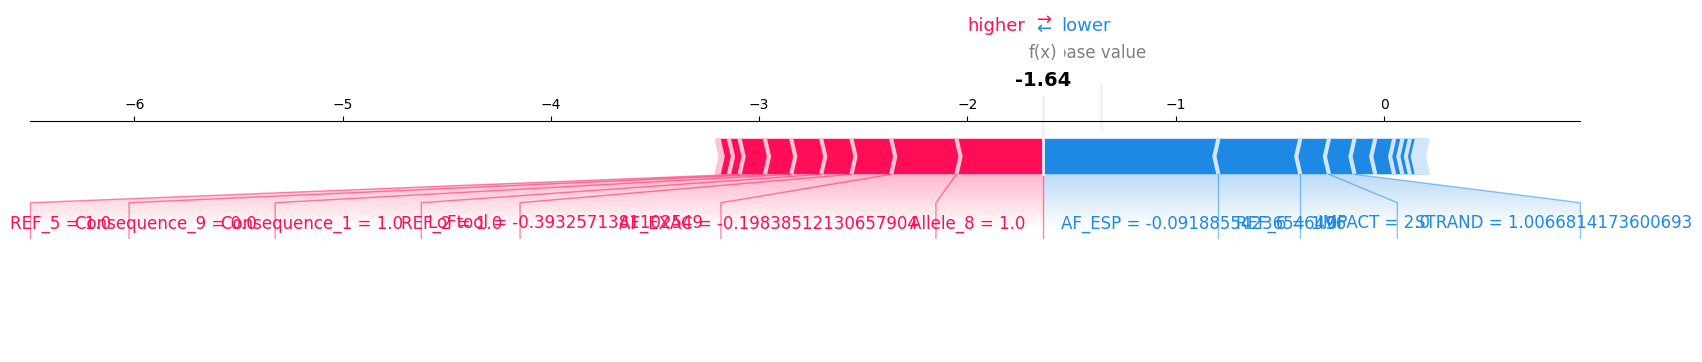

In [57]:
# Построение графика force для одного объекта
shap.force_plot(explainer.expected_value, shap_value_single, sample, matplotlib=True)
plt.show()


### Построение графика force для среза произвольного размера (например, первых 100 объектов)

In [58]:
# Создание force plot и сохранение в HTML файл
import IPython
force_plot = shap.force_plot(explainer.expected_value, shap_values[:100], X_test1[:100])
shap.save_html("force_plot.html", force_plot)

# Отображение HTML файла в Colab
IPython.display.HTML(filename="force_plot.html")

### Построение графика bar для одного объекта

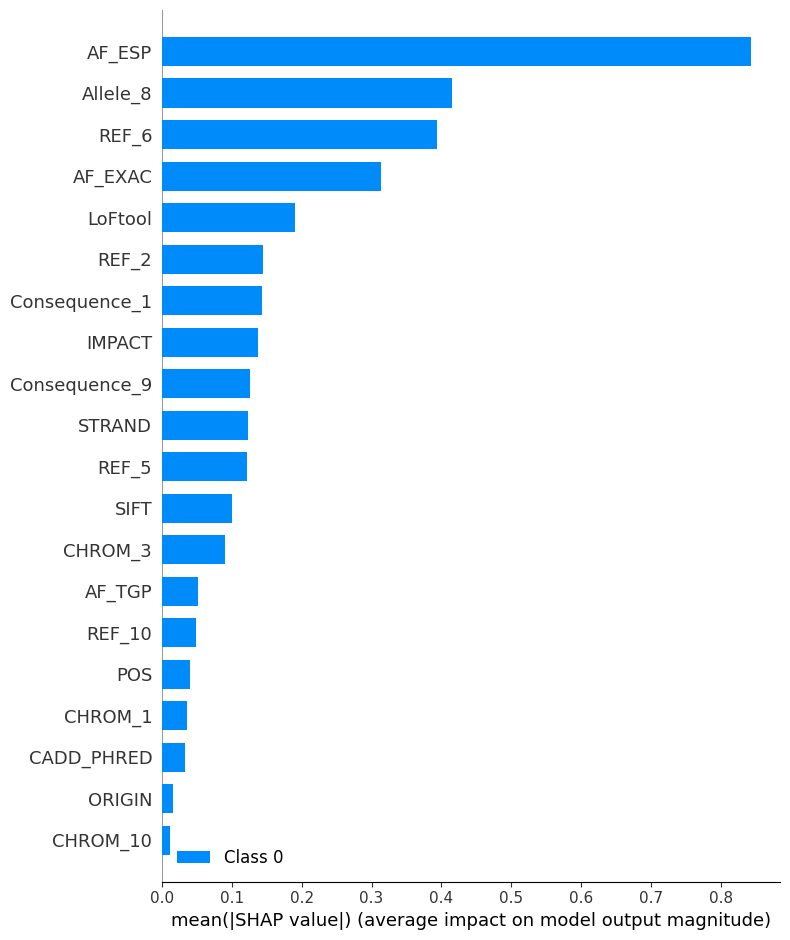

In [59]:
shap.summary_plot([shap_value_single], features=[sample], feature_names=X_train1.columns, plot_type="bar")
plt.show()


### Построение графика waterfall для одного объекта

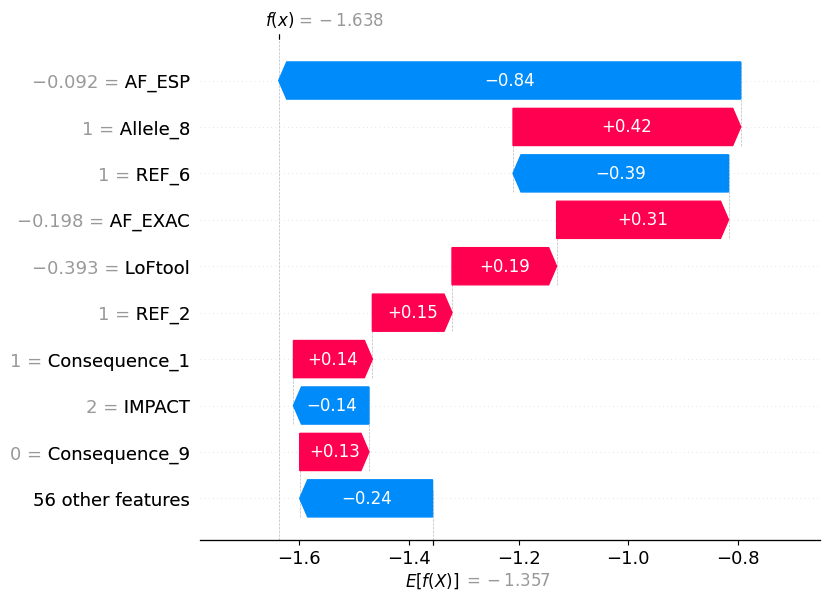

In [60]:
sample_index = 0  # Выберите индекс образца, который вы хотите построить
sample_shap_values = shap_value_single[sample_index]
sample = X_test1.iloc[sample_index]

explanation = shap.Explanation(values=sample_shap_values, base_values=explainer.expected_value, data=sample)
shap.waterfall_plot(explanation, max_display=10, show=True)

In [ ]:
# Получение индекса признака 'AF_EXAC'
# Получение списка признаков из DataFrame
feature_names = X_train1.columns.tolist()

# Вывод списка признаков с их индексами
for i, feature in enumerate(feature_names):
    print(f"Индекс {i}: Признак {feature}")


Индекс 0: Признак POS
Индекс 1: Признак AF_ESP
Индекс 2: Признак AF_EXAC
Индекс 3: Признак AF_TGP
Индекс 4: Признак CLNVC
Индекс 5: Признак ORIGIN
Индекс 6: Признак IMPACT
Индекс 7: Признак BIOTYPE
Индекс 8: Признак STRAND
Индекс 9: Признак SIFT
Индекс 10: Признак PolyPhen
Индекс 11: Признак LoFtool
Индекс 12: Признак CADD_PHRED
Индекс 13: Признак CADD_RAW
Индекс 14: Признак BLOSUM62
Индекс 15: Признак ALT_1
Индекс 16: Признак ALT_2
Индекс 17: Признак ALT_3
Индекс 18: Признак ALT_4
Индекс 19: Признак ALT_5
Индекс 20: Признак ALT_6
Индекс 21: Признак ALT_7
Индекс 22: Признак ALT_8
Индекс 23: Признак ALT_9
Индекс 24: Признак ALT_10
Индекс 25: Признак REF_1
Индекс 26: Признак REF_2
Индекс 27: Признак REF_3
Индекс 28: Признак REF_4
Индекс 29: Признак REF_5
Индекс 30: Признак REF_6
Индекс 31: Признак REF_7
Индекс 32: Признак REF_8
Индекс 33: Признак REF_9
Индекс 34: Признак REF_10
Индекс 35: Признак CHROM_1
Индекс 36: Признак CHROM_2
Индекс 37: Признак CHROM_3
Индекс 38: Признак CHROM_4
Инд

### График shap.plots.scatter для признака 'AF_EXAC', раскраска относительно себя

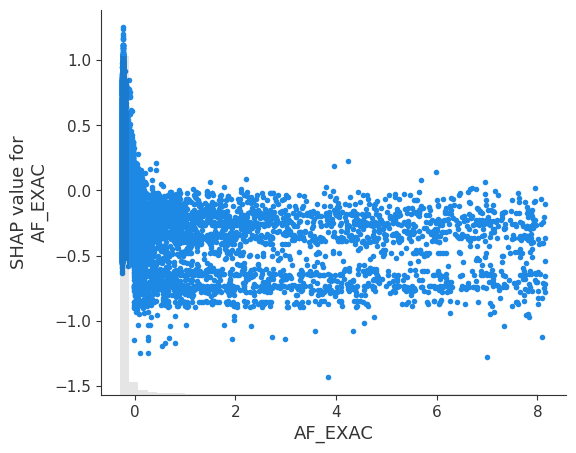

In [61]:
explainer = shap.Explainer(best_model)
shap_values = explainer(X_train1)
shap.plots.scatter(shap_values[:, 'AF_EXAC'])

### График shap.plots.scatter для признака 'AF_EXAC', раскраска относительно другого признака 'AF_TGP'

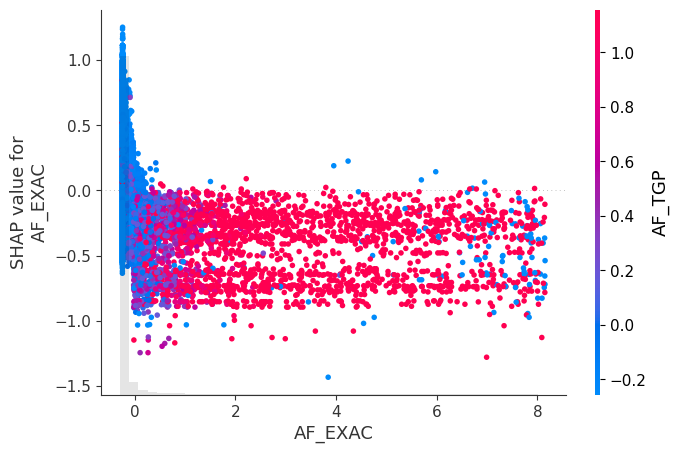

In [62]:
shap.plots.scatter(shap_values[:, 'AF_EXAC'], color=shap_values[:, 'AF_TGP'])

### График shap.plots.beeswarm для всех признаков

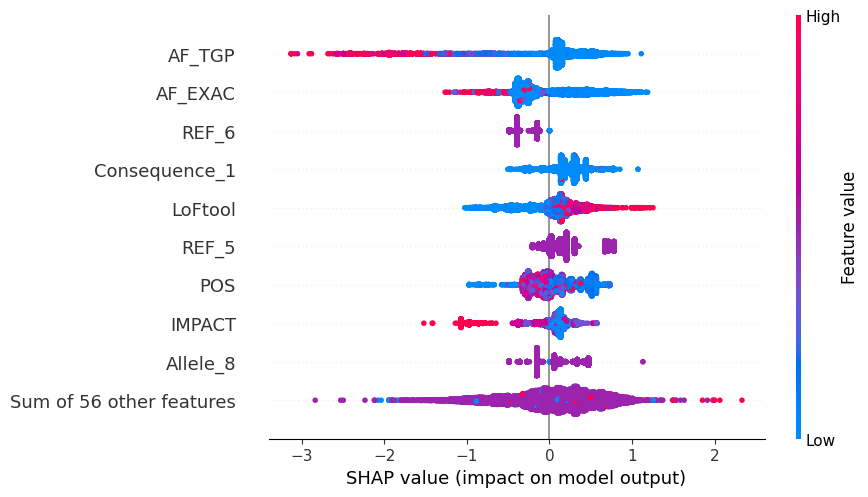

In [63]:
# Создаем объяснитель для лучшей модели
explainer = shap.TreeExplainer(best_model)

# Получаем SHAP значения для всей выборки
shap_values = explainer.shap_values(X_test1)


# Предполагаем, что «shap_values» — это массив значений SHAP, а «explainer» — ваш объект объяснения SHAP.
shap_values_explanation = shap.Explanation(values=shap_values, base_values=explainer.expected_value, data=X_test1, feature_names=X_test1.columns)

shap.plots.beeswarm(shap_values_explanation)




### Построение графика bar для всех признаков

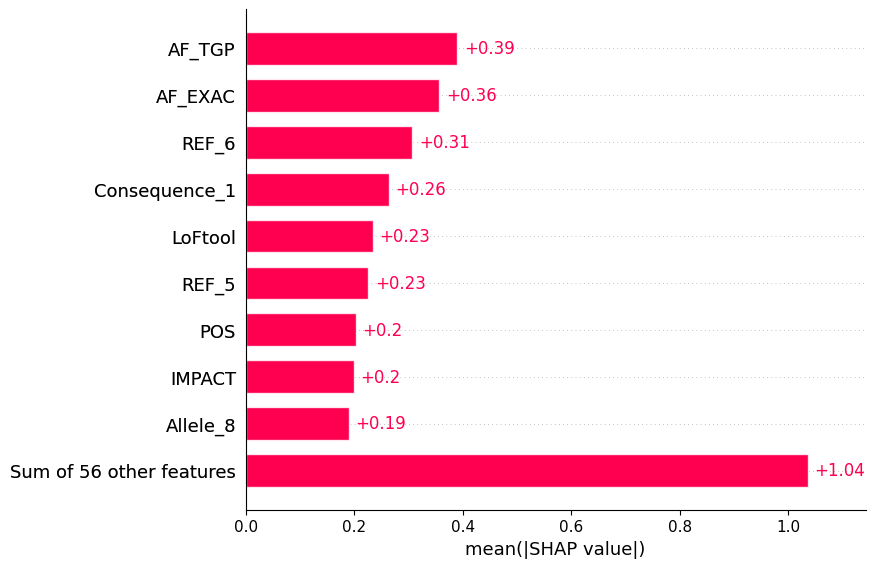

In [64]:
shap_values_explanation = shap.Explanation(values=shap_values, base_values=explainer.expected_value, data=X_test1, feature_names=X_test1.columns)
shap.plots.bar(shap_values_explanation)

### Фильтрация признаков, переобучение лучщей модели

In [65]:
# Получаем лучшую модель
best_model = best_models1['CatBoost_with_categorical']
# Преобразуем X_test1 в DataFrame, если это numpy массив
if isinstance(X_test1, np.ndarray):
    X_test1 = pd.DataFrame(X_test1, columns=X_train1.columns)

# Сравниваем столбцы в тренировочном и тестовом наборах данных
missing_cols_in_train = set(X_test1.columns) - set(X_train1.columns)
missing_cols_in_test = set(X_train1.columns) - set(X_test1.columns)

# Удаляем лишние столбцы из тестового набора данных
if missing_cols_in_test:
    X_test1 = X_test1.drop(columns=list(missing_cols_in_test))

# Удаляем лишние столбцы из тренировочного набора данных (если необходимо)
if missing_cols_in_train:
    X_train1 = X_train1.drop(columns=list(missing_cols_in_train))

# Обучаем модель на тренировочных данных для получения важностей признаков
best_model.fit(X_train1, y_train1)

# Получаем важности признаков
xgb_feature_importances = best_model.feature_importances_

# Устанавливаем порог важности
threshold = 0.0001
# Отфильтровываем признаки для XGBoost
important_features = X_train1.columns[xgb_feature_importances > threshold]

# Фильтруем тренировочные и тестовые наборы данных по важным характеристикам
X_train_filtered = X_train1[important_features]
X_test_filtered = X_test1[important_features]

# Определяем столбцы типа object
object_cols = X_train_filtered.select_dtypes(include=['object']).columns
print("Object columns:", object_cols)

# Инициализируем LabelEncoder
le_dict = {}

# Применяем LabelEncoder к каждому столбцу типа object
for col in object_cols:
    le = LabelEncoder()
    X_train_filtered[col] = le.fit_transform(X_train_filtered[col].astype(str))
    # Сохраняем обученный LabelEncoder для каждого столбца
    le_dict[col] = le

# Функция для преобразования тестовых данных с обработкой неизвестных меток
def transform_with_unseen_handling(column, le, data):
    known_labels = set(le.classes_)
    data[column] = data[column].apply(lambda x: x if x in known_labels else 'UNKNOWN')
    le.classes_ = np.append(le.classes_, 'UNKNOWN')
    return le.transform(data[column].astype(str))

# Преобразуем тестовые данные
for col in object_cols:
    X_test_filtered[col] = transform_with_unseen_handling(col, le_dict[col], X_test_filtered)



# Масштабирование признаков
scaler = StandardScaler()
X_train_filtered = scaler.fit_transform(X_train_filtered)
X_test_filtered = scaler.transform(X_test_filtered)


# Разбиваем тренировочные данные на тренировочный и валидационный наборы
X_train_filtered_split, X_val_filtered_split, y_train1_split, y_val1_split = train_test_split(X_train_filtered, y_train1, test_size=0.2, random_state=42)


# Тренируем модель
best_model_filtered = best_model.fit(X_train_filtered_split, y_train1_split, eval_set=[(X_val_filtered_split, y_val1_split)], early_stopping_rounds=10, verbose=False)
y_pred_after = best_model_filtered.predict(X_test_filtered)

Object columns: Index([], dtype='object')


### Сравнение метрик до и после фильтрации

In [66]:
best_model_metrics = model_metrics1[best_model_name]
print(f"\nдо фильтрации: {best_model_name}")
print(f"Accuracy = {best_model_metrics['accuracy']}")
print(f"Precision = {best_model_metrics['precision']}")
print(f"Recall = {best_model_metrics['recall']}")
print(f"F1 = {best_model_metrics['f1_score']}")
print(f"Classification report:\n{best_model_metrics['classification_report']}")


print("\nMetrics after filtering:")
print(f"Accuracy = {accuracy_score(y_test1, y_pred_after.round())}")
print(f"Precision = {precision_score(y_test1, y_pred_after.round(), zero_division=1)}")
print(f"Recall = {recall_score(y_test1, y_pred_after.round(), zero_division=1)}")
print(f"F1 = {f1_score(y_test1, y_pred_after.round(), zero_division=1)}")
print(f"Classification report:\n{classification_report(y_test1, y_pred_after.round(), zero_division=1)}")


до фильтрации: CatBoost_with_categorical
Accuracy = 0.7608148739031724
Precision = 0.5598975016015375
Recall = 0.21395348837209302
F1 = 0.3095997166135317
Classification report:
              precision    recall  f1-score   support

           0       0.78      0.94      0.86     12212
           1       0.56      0.21      0.31      4085

    accuracy                           0.76     16297
   macro avg       0.67      0.58      0.58     16297
weighted avg       0.73      0.76      0.72     16297


Metrics after filtering:
Accuracy = 0.762901147450451
Precision = 0.5530994714079769
Recall = 0.2817625458996328
F1 = 0.37333765812520275
Classification report:
              precision    recall  f1-score   support

           0       0.79      0.92      0.85     12212
           1       0.55      0.28      0.37      4085

    accuracy                           0.76     16297
   macro avg       0.67      0.60      0.61     16297
weighted avg       0.73      0.76      0.73     16297



Результаты до и после фильтрации для модели CatBoost показывают некоторое улучшение в метриках после фильтрации признаков. Точность (Precision) и F1-мера выросли после фильтрации, в то время как полнота (Recall) немного увеличилась.

До фильтрации:
- Accuracy = 0.7608
- Precision = 0.5599
- Recall = 0.2139
- F1 = 0.3096

После фильтрации:
- Accuracy = 0.7629
- Precision = 0.5531
- Recall = 0.2818
- F1 = 0.3733

Эти изменения в метриках говорят о том, что фильтрация признаков с помощью feature_importance дала некоторое улучшение производительности модели.

### Визуализирование полученного дерева решений

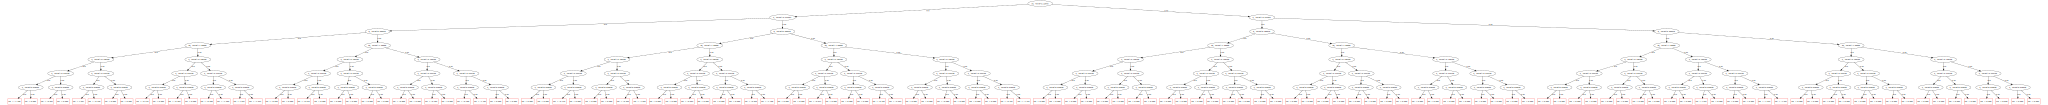

In [67]:
# Визуализация дерева решений для CatBoost
best_model_filtered.plot_tree(tree_idx=0, pool=Pool(X_train_filtered_split, y_train1_split))

## Задание 5. Регрессия

**Подбор гиперпараметров и вывод метрик на тестовом наборе**

In [68]:

xgb_params = {
    'n_estimators': [10, 50, 100],
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [3, 5, 7],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [1, 0.1, 0.5]
}


xgb_model = xgb.XGBRegressor()

xgb_grid_search = GridSearchCV(estimator=xgb_model, param_grid=xgb_params, cv=3, verbose=0)
xgb_grid_search.fit(X_train, y_train)
xgb_best_model = xgb_grid_search.best_estimator_

# Предсказания и метрики для XGBoost use_label_encoder=False
xgb_y_pred = xgb_best_model.predict(X_test)
print("XGBoost Metrics:")
print(f"MAE: {mean_absolute_error(y_test, xgb_y_pred)}")
print(f"MSE: {mean_squared_error(y_test, xgb_y_pred)}")
print(f"R^2: {r2_score(y_test, xgb_y_pred)}")


XGBoost Metrics:
MAE: 0.30980675999999974
MSE: 0.15391146741412376
R^2: 0.18057831390540569


In [69]:

catboost_params = {
    'iterations': [10, 50, 100],
    'learning_rate': [0.01, 0.1, 0.3],
    'depth': [3, 5, 7],
    'l2_leaf_reg': [1, 3, 5],
    'early_stopping_rounds': [5, 10, 20]
}

catboost_model = CatBoostRegressor(verbose=0, random_state=42)

catboost_grid_search = GridSearchCV(estimator=catboost_model, param_grid=catboost_params, cv=3, verbose=0)
catboost_grid_search.fit(X_train, y_train)
catboost_best_model = catboost_grid_search.best_estimator_

# Предсказания и метрики для CatBoost
catboost_y_pred = catboost_best_model.predict(X_test)
print("CatBoost Metrics:")
print(f"MAE: {mean_absolute_error(y_test, catboost_y_pred)}")
print(f"MSE: {mean_squared_error(y_test, catboost_y_pred)}")
print(f"R^2: {r2_score(y_test, catboost_y_pred)}")


CatBoost Metrics:
MAE: 0.31249836345523163
MSE: 0.15473633136713227
R^2: 0.1761867541176334


### Переобучение на отфильтрованном наборе признаков

In [70]:
# Переобучение XGBoost
xgb_best_model_filtered = xgb_best_model.fit(X_train_filtered, y_train1)
xgb_y_pred_filtered = xgb_best_model_filtered.predict(X_test_filtered)

# Переобучение CatBoost
catboost_best_model_filtered = catboost_best_model.fit(X_train_filtered, y_train1)
catboost_y_pred_filtered = catboost_best_model_filtered.predict(X_test_filtered)

# Метрики до и после фильтрации для XGBoost
print("XGBoost Metrics after filtering:")
print(f"MAE: {mean_absolute_error(y_test1, xgb_y_pred_filtered)}")
print(f"MSE: {mean_squared_error(y_test1, xgb_y_pred_filtered)}")
print(f"R^2: {r2_score(y_test1, xgb_y_pred_filtered)}")

# Метрики до и после фильтрации для CatBoost
print("\nCatBoost Metrics after filtering:")
print(f"MAE: {mean_absolute_error(y_test1, catboost_y_pred_filtered)}")
print(f"MSE: {mean_squared_error(y_test1, catboost_y_pred_filtered)}")
print(f"R^2: {r2_score(y_test1, catboost_y_pred_filtered)}")

XGBoost Metrics after filtering:
MAE: 0.31182139875549825
MSE: 0.15510795782913295
R^2: 0.17420822199649777

CatBoost Metrics after filtering:
MAE: 0.3134446909837559
MSE: 0.15546803430414372
R^2: 0.17229118178348735


### Сравнение метрик до и после фильтрации

**Для XGBoost:**

* MAE (средняя абсолютная ошибка) незначительно увеличилась после фильтрации.
* MSE (среднеквадратическая ошибка) также немного выросла после фильтрации.
* R^2 (коэффициент детерминации) немного уменьшился после фильтрации.

**Для CatBoost:**

* MAE немного выросла после фильтрации.
* MSE немного увеличилась после фильтрации.
* R^2 немного уменьшился после фильтрации.

Общий тренд показывает, что фильтрация признаков не привела к значимым изменениям в производительности моделей XGBoost и CatBoost.

**Визуализация дерева решений на отфильтрованном наборе**

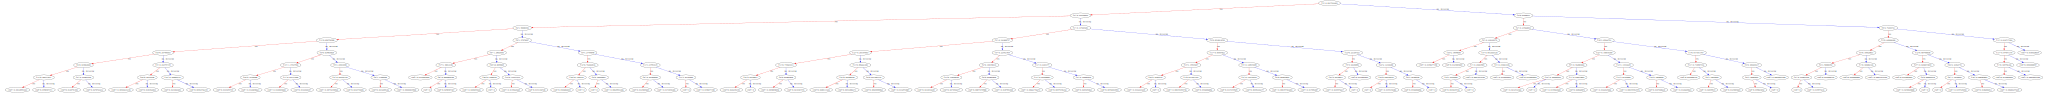

In [71]:
# Получение дерева из модели
booster = xgb_best_model_filtered.get_booster()
tree = booster.get_dump()[0]  # Получаем первое дерево

# Преобразование дерева в формат Graphviz
xgb.to_graphviz(booster, num_trees=0)

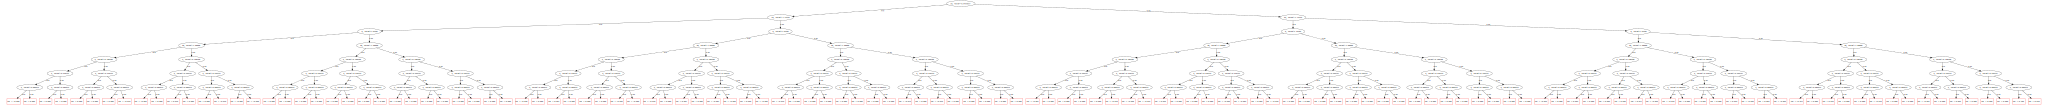

In [72]:
# Визуализация дерева решений для CatBoost
catboost_best_model.plot_tree(tree_idx=0, pool=Pool(X_train_filtered, y_train1))
